In [5]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
## Load idx2class csv file and load it into a dictionary
idx2class_csv = '/mnt/disks/large/data/labels.csv'
df = pd.read_csv(idx2class_csv)

idx2class = {}
for i in range(len(df)):
    idx2class[df.iloc[i,0]] = df.iloc[i,1]
print(idx2class)

{0: 'culture::abruzzi', 1: 'culture::achaemenid', 2: 'culture::aegean', 3: 'culture::afghan', 4: 'culture::after british', 5: 'culture::after german', 6: 'culture::after german original', 7: 'culture::after italian', 8: 'culture::after russian original', 9: 'culture::akkadian', 10: 'culture::alexandria-hadra', 11: 'culture::algerian', 12: 'culture::alsace', 13: 'culture::american', 14: 'culture::american or european', 15: 'culture::amsterdam', 16: 'culture::ansbach', 17: 'culture::antwerp', 18: 'culture::apulian', 19: 'culture::arabian', 20: 'culture::aragon', 21: 'culture::arica', 22: 'culture::asia minor', 23: 'culture::assyrian', 24: 'culture::atlantic watershed', 25: 'culture::attic', 26: 'culture::augsburg', 27: 'culture::augsburg decoration', 28: 'culture::augsburg original', 29: 'culture::austrian', 30: 'culture::avignon', 31: 'culture::avon', 32: 'culture::aztec', 33: 'culture::babylonian', 34: 'culture::babylonian or kassite', 35: 'culture::bactria-margiana archaeological comp

In [7]:
results_dir = '/mnt/disks/large/output/cnnrnn_final/test/test-01/dev_visualization'
#results_dir = '/mnt/disks/large/output/cnnrnn_test_cropOnly/test/test-01/dev_visualization'

In [8]:
with open(results_dir, 'rb') as f:
    results_attn = pickle.load(f)

In [9]:
labels_pred = results_attn['labels_pred']
alphas = results_attn['alphas']
imgs = results_attn['imgs']
ids = results_attn['orig_id']

In [10]:
ids

('fefc7b0cc0f5089f.png',
 'fefd7c1415a9d178.png',
 'ff0ac5b567774c03.png',
 'ff0f30a3a8fd839a.png',
 'ff1a3089fee4a621.png',
 'ff1a7ec5f205ee04.png',
 'ff1c61c2615fed36.png',
 'ff312ea6dfe11ae6.png',
 'ff327934a1da925c.png',
 'ff3b3e45eb6c75b.png',
 'ff3c6a1347b59e72.png',
 'ff4608b12ed3d091.png',
 'ff49d5265429c54.png',
 'ff49e013eb9c3b29.png',
 'ff4cbec58caa143.png',
 'ff4f88a449108233.png',
 'ff56ba3fc6849fa2.png',
 'ff5ce84497ff5e20.png',
 'ff6b21dee5dbea81.png',
 'ff6b467ea0c369d2.png',
 'ff76c4af3e265518.png',
 'ff76f8ff4a655155.png',
 'ff78515db983fbf7.png',
 'ff80a04bb65ddc74.png',
 'ff897142b0e8776c.png',
 'ff9f3dbc8ad3e621.png',
 'ffa35138b5c65d75.png',
 'ffad26d5a620f0a8.png',
 'ffc3908b12ea30f1.png',
 'ffc54a4465687218.png',
 'ffcf33c5407b8201.png',
 'ffcf859939b90b2b.png',
 'ffcf87253bea7ee1.png',
 'ffd93b99e3618930.png',
 'ffdc3794f3102ae6.png',
 'ffde54c429f8a54a.png',
 'ffe630a75e12e926.png',
 'ffe67c2ed0443aab.png',
 'fff10c8e135c00ab.png',
 'fff4519bee1e950c.png')

In [11]:
print(labels_pred.shape) # (batch_size * ncrops, NUM_CLASSES)
print(alphas.shape) # (batch_size * ncrops, MAX_LABEL_LENGTH, 14*14)
print(imgs.shape) # (batch_size, ncrops, n_channels, 224, 224)
print(len(ids))

#alphas = alphas.reshape([240, 10, 14, -1])
imgs = imgs.reshape([-1, 3, 224, 224])
imgs = np.transpose(imgs, (0, 2, 3, 1))

print(imgs.shape)

(240, 1103)
(240, 10, 196)
(40, 6, 3, 224, 224)
40
(240, 224, 224, 3)


In [12]:
## Check which images have predicted labels
print(np.sum(labels_pred, axis=1))

[10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  2.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  8.  1.  1.
 10.  1.  5.  2.  2.  3. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  2.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1. 10. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  4.  1.  2.  1.  2.
 10.  1.  1.  1.  1.  1.  8.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1.]


In [14]:
## Adapted from https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Image-Captioning/blob/master/caption.py
## Function to visualize attention map for one image
def visualize_att(img_path, image, ground_truth, pred_labels, alphas, idx2class, smooth=True):
    """
    Visualizes caption with weights at every word.
    Adapted from paper authors' repo: https://github.com/kelvinxu/arctic-captions/blob/master/alpha_visualization.ipynb
    Args:
        img_path: path to image
        image: numpy array of image, may be cropped, resized and/or normalized from raw image
        ground_truth: list of predicted labels (in the form of strings of numbers)
        pred_labels: predicted labels one-hot encoded, size (NUM_CLASSES,)
        alphas: attention weights, size (MAX_LABEL_LENGTH, 14 * 14)
        idx2class: dictionary mapping indices to class names
        smooth: boolean, whether smooth weights
    """
    
    # Convert predicted labels to strings
    label_nums = np.argwhere(pred_labels == 1.0).reshape(-1).tolist()
    num_pred = len(label_nums)
    
    
    # Plot raw image with ground truth labels
    gt_str = ''
    for gt in ground_truth:
        if gt_str == '':
            gt_str = gt_str + gt
        else:
            gt_str = gt_str + '\n' + gt
    
    
    raw_img = Image.open(img_path)
    plt.subplot(1, num_pred + 2, 1)
    plt.text(0, -50, '%s' % (gt_str), color='black', backgroundcolor='white', fontsize=12)
    plt.imshow(raw_img)
    plt.axis('off')
    #image = image.resize([14 * 50, 14 * 50])
    #image = image.resize([14 * 24, 14 * 24], Image.LANCZOS)
    #image = image.resize([224, 224], Image.LANCZOS)

    plt.subplot(1, num_pred + 2, 2)
    plt.imshow(image)
    plt.axis('off')
    
  
    for t, lab in enumerate(label_nums):
        plt.subplot(1, num_pred + 2, t + 3)
        
        print(idx2class[lab])
        plt.text(0, -50, '%s' % (idx2class[lab]), color='blue', backgroundcolor='white', fontsize=12)
        plt.imshow(image)
        current_alpha = alphas[t, :].reshape(14, 14)
        if smooth:
            alpha = skimage.transform.pyramid_expand(current_alpha, upscale=16, sigma=50)
       #     alpha = skimage.transform.pyramid_expand(current_alpha, upscale=1, sigma=8)
        else:
            alpha = skimage.transform.resize(current_alpha, [14 * 16, 14 * 16])
        #if t == 0:
        #    plt.imshow(alpha, alpha=0)
        #else:
        #print(alpha)
        
        plt.imshow(alpha, alpha=0.9)
        plt.set_cmap(cm.Greys_r)
        #plt.set_cmap('binary')
        plt.axis('off')
    plt.show()


In [15]:
# Ground truth labels
test_label_file = '/mnt/disks/large/data/train_split/train_split_val.csv'
#test_label_file = '/mnt/disks/large/debug_data/train_split_val.csv'
label_df = pd.read_csv(test_label_file)

ff0ac5b567774c03.png


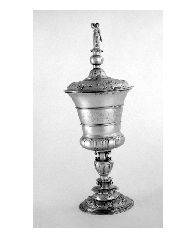

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


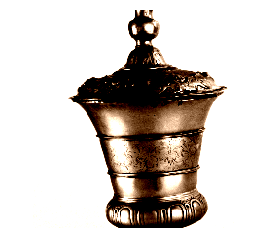

(224, 224, 3)
['culture::british', 'culture::london', 'tag::cups', 'tag::women']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tag::utilitarian objects


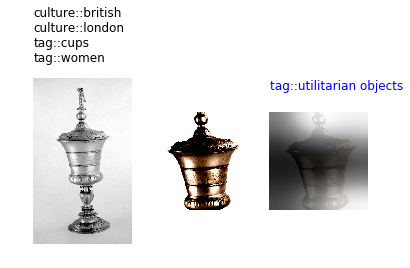

In [24]:
import os
from PIL import Image
import skimage
import matplotlib.cm as cm

test_img_dir = '/mnt/disks/large/data/train_split/val'
#test_img_dir = '/mnt/disks/large/debug_data/val'

#id_idx = 4
#idx = id_idx * 6 + 2

#id_idx = 8
#idx = id_idx * 6 + 2

#id_idx = 13
#idx = id_idx * 6 + 1

#id_idx = 19
#idx = id_idx * 6 + 1

id_idx = 2
idx = id_idx * 6 + 4

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img_path, img, orig_label_names, pred_label, alpha, idx2class, smooth=True)

ff1a3089fee4a621.png


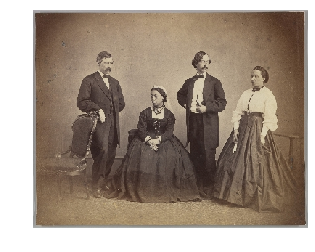

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


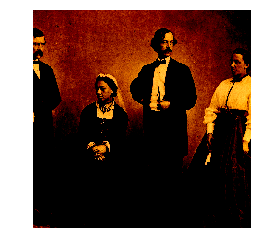

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
['tag::men', 'tag::women']
tag::portraits


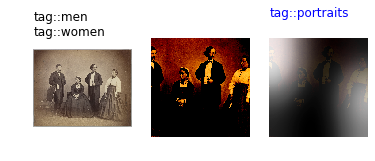

In [132]:
id_idx = 4
idx = id_idx * 6 + 5

#id_idx = 8
#idx = id_idx * 6 + 2

#id_idx = 13
#idx = id_idx * 6 + 1

#id_idx = 19
#idx = id_idx * 6 + 1

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img_path, img, orig_label_names, pred_label, alpha, idx2class, smooth=True)

ff6b467ea0c369d2.png


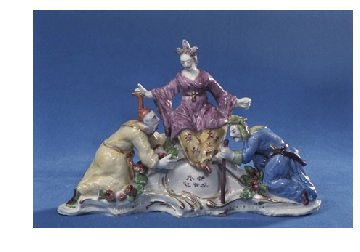

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


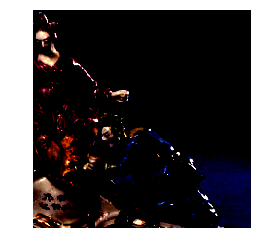

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
['culture::bow', 'culture::british', 'culture::london', 'tag::goddess', 'tag::inscriptions', 'tag::men', 'tag::worshiping']


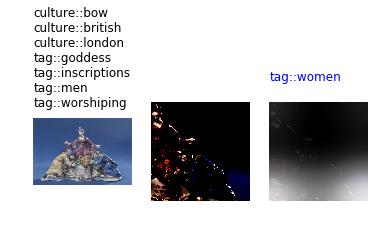

In [17]:
#id_idx = 4
#idx = id_idx * 6 + 2

#id_idx = 13
#idx = id_idx * 6 + 1

id_idx = 19
idx = id_idx * 6 + 2

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img_path, img, orig_label_names, pred_label, alpha, idx2class, smooth=True)

fefd7c1415a9d178.png


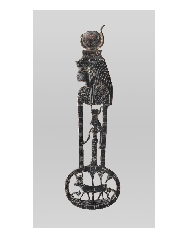

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


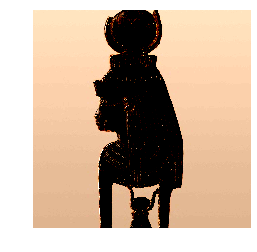

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
['culture::egyptian', 'tag::cows', 'tag::hathor']


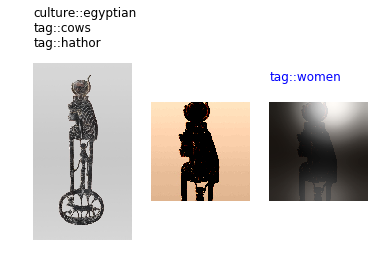

In [22]:
#id_idx = 8
#idx = id_idx * 6 + 2

id_idx = 1
idx = id_idx * 6 + 5

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img_path, img, orig_label_names, pred_label, alpha, idx2class, smooth=True)

ff49e013eb9c3b29.png


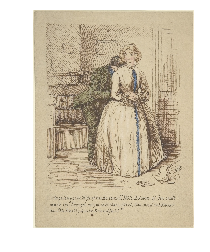

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


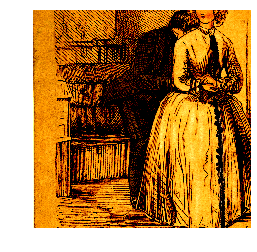

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
['culture::british', 'tag::men', 'tag::women']


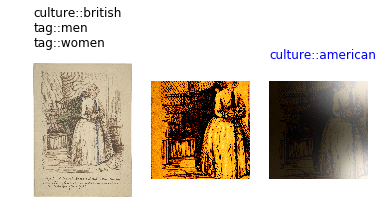

In [25]:
id_idx = 13
idx = id_idx * 6 + 4

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img_path, img, orig_label_names, pred_label, alpha, idx2class, smooth=True)